In [54]:
from pathlib import Path
import pandas as pd
from datetime import datetime

pth_base = Path('.','base')
pth_base_originais = Path(pth_base, 'originais')
pth_base_editados =  Path(pth_base, 'editados')

for pth in [pth_base, pth_base_originais, pth_base_editados]:
    Path.mkdir(pth, exist_ok=True)

for csv in [csv for csv in pth_base.glob('*.csv')]:
    destino = Path(pth_base_originais, csv.name)
    csv.replace(destino)

pth_origins = [csv.absolute() for csv in pth_base_originais.glob('*.csv')]

dt_frames = [pd.read_csv(csv, sep='|', encoding='latin-1') for csv in pth_origins]

dtf = pd.concat(dt_frames)

pth_concact = Path(pth_base_editados,'concat_base.csv')
dtf.to_csv(pth_concact, sep=';', encoding='utf-8', index=False)

df_concat_base = pd.read_csv(pth_concact, sep=';', encoding='utf-8')


In [6]:
df_concat_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2127 entries, 0 to 2126
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   cod_pessoa        2127 non-null   int64 
 1   data_coleta       2127 non-null   object
 2   genero            2127 non-null   object
 3   data_nascimento   2127 non-null   object
 4   animal_estimacao  2127 non-null   object
 5   clima             2127 non-null   object
 6   bebida_favorita   2127 non-null   object
 7   hobbies           2127 non-null   object
dtypes: int64(1), object(7)
memory usage: 133.1+ KB


In [7]:
df_concat_base.describe

<bound method NDFrame.describe of       cod_pessoa data_coleta     genero data_nascimento animal_estimacao  \
0       10141535  2020-08-22   Feminino      1957-07-25         cachorro   
1       10142449  2020-08-22  Masculino      1969-12-09         cachorro   
2       10142735  2020-08-22  Masculino      1978-11-15            peixe   
3       10143016  2020-08-22  Masculino      1988-12-20        tartaruga   
4       10143094  2020-08-22  Masculino      1980-05-22        tartaruga   
...          ...         ...        ...             ...              ...   
2122    10143233  2020-01-06  Masculino      1987-02-25        tartaruga   
2123    10142037  2020-08-10   Feminino      1977-08-18             gato   
2124    10142592  2020-08-10  Masculino      1964-09-05        tartaruga   
2125    10143378  2020-08-10  Masculino      1970-04-26         cachorro   
2126    10143442  2020-08-10   Feminino      1970-11-18         cachorro   

         clima bebida_favorita             hobbies  


In [8]:
df_concat_base.head(3)

,cod_pessoa,data_coleta,genero,data_nascimento,animal_estimacao,clima,bebida_favorita,hobbies
0,10141535,2020-08-22,Feminino,1957-07-25,cachorro,quente,refrigerante,Assistir TV
1,10142449,2020-08-22,Masculino,1969-12-09,cachorro,moderado,Cerveja,Aprender algo novo
2,10142735,2020-08-22,Masculino,1978-11-15,peixe,moderado,Café,Ler livros


In [9]:
has_nulos = df_concat_base.isna().sum().any()
if has_nulos:
    df_concat_base = df_concat_base.dropna()

has_duplicatas = df_concat_base.duplicated().any()
if has_duplicatas:
    df_concat_base = df_concat_base.drop_duplicates()

In [10]:
df_concat_base

,cod_pessoa,data_coleta,genero,data_nascimento,animal_estimacao,clima,bebida_favorita,hobbies
0,10141535,2020-08-22,Feminino,1957-07-25,cachorro,quente,refrigerante,Assistir TV
1,10142449,2020-08-22,Masculino,1969-12-09,cachorro,moderado,Cerveja,Aprender algo novo
2,10142735,2020-08-22,Masculino,1978-11-15,peixe,moderado,Café,Ler livros
3,10143016,2020-08-22,Masculino,1988-12-20,tartaruga,moderado,Chá,Praticar esporte
4,10143094,2020-08-22,Masculino,1980-05-22,tartaruga,quente,Chá,Escrever
...,...,...,...,...,...,...,...,...
2122,10143233,2020-01-06,Masculino,1987-02-25,tartaruga,quente,Cerveja,Pintar quadros
2123,10142037,2020-08-10,Feminino,1977-08-18,gato,moderado,Cerveja,Ler livros
2124,10142592,2020-08-10,Masculino,1964-09-05,tartaruga,quente,Água,Aprender algo novo
2125,10143378,2020-08-10,Masculino,1970-04-26,cachorro,moderado,Água,Escrever


In [24]:

df_mulheres = df_concat_base[lambda ln: ln['genero'] == "Feminino"]
df_mulheres.value_counts("animal_estimacao")


animal_estimacao
gato         279
peixe        158
tartaruga    149
cachorro     143
Name: count, dtype: int64

In [32]:
"""Qual é a soma das pessoas que gostam de cachorro ou gato?"""

ma_fe_g_c = df_concat_base[lambda ln: ln["animal_estimacao"].isin(["gato","cachorro"])]
soma_pessoas = len(ma_fe_g_c)
soma_pessoas

1278

In [37]:
"""Quantos homens preferem o clima frio?"""
ma_frio = df_concat_base[lambda ln: (ln["genero"]=="Masculino") & (ln["clima"]=="frio")]
soma_ma_frio = len(ma_frio)
soma_ma_frio

472

In [63]:
df_concat_base["data_nascimento"] = pd.to_datetime(df_concat_base["data_nascimento"])
data_atual = datetime(2023, 12, 31)
df_concat_base["idade"] = df_concat_base["data_nascimento"].apply(
    lambda x: data_atual.year - x.year - ((data_atual.month, data_atual.day) < (x.month, x.day))
)

ma_frio_cha = df_concat_base[lambda ln: (ln["genero"] == "Masculino") & 
                                       (ln["clima"] == "frio") & 
                                       (ln["bebida_favorita"] == "Chá")]
media_idade = ma_frio_cha["idade"].mean()
print(f"Média de idade dos homens que preferem chá e clima frio: {media_idade:.2f} anos")

Média de idade dos homens que preferem chá e clima frio: 45.85 anos


In [69]:
"Quantos participantes da pesquisa gostam de cachorro?"

df_m_f_c = df_concat_base[lambda ln: ln["animal_estimacao"] == "cachorro"]
len(df_m_f_c)

414

In [ ]:
"""Qual é o hobby de menor preferência para os homens?"""
df_m_h = df_concat_base[lambda ln: ln["genero"] == "Masculino"]["hobbies"]

contagem_hobbies = df_m_h.value_counts()
# Hobby de menor preferência
hobby_maior = contagem_hobbies.idxmin()
frequencia_maior = contagem_hobbies.min()

print(f"Hobby de menor preferência entre homens: {hobby_maior} ({frequencia_maior} ocorrências)")

Hobby de menor preferência entre homens: Escutar música (153 ocorrências)


In [82]:
"""Qual o hobby de maior preferência entre as mulheres?"""

df_f_h = df_concat_base[lambda ln: ln["genero"] == "Feminino"]["hobbies"]

contagem_hobbies = df_m_h.value_counts()
print(contagem_hobbies)
# Hobby de menor preferência
hobby_maior = contagem_hobbies.idxmax()
frequencia_maior = contagem_hobbies.max()

print(f"Hobby de maior preferência entre mulheres: {hobby_maior} ({frequencia_maior} ocorrências)")

hobbies
Dormir                184
Aprender algo novo    183
Escrever              182
Ler livros            177
Praticar esporte      175
Assistir TV           173
Pintar quadros        171
Escutar música        153
Name: count, dtype: int64
Hobby de maior preferência entre mulheres: Dormir (184 ocorrências)


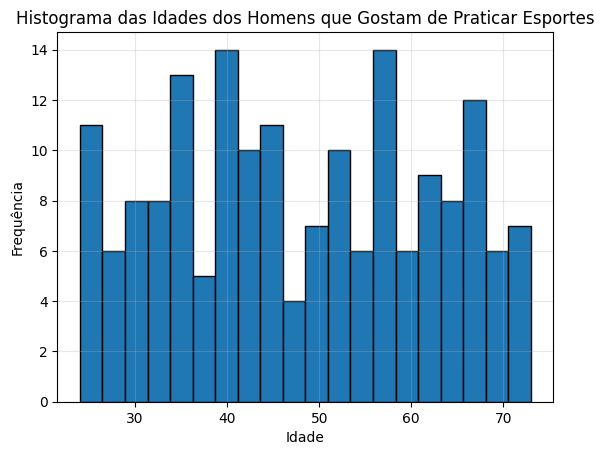

Número de homens que gostam de praticar esportes: 175


In [88]:
"""Crie um gráfico de histograma com 20 barras das idades de todos os homens que gostam de praticar esportes."""
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar homens que gostam de praticar esportes
df_mas_hob_esp = df_concat_base[lambda ln: (ln["genero"] == "Masculino") & (ln["hobbies"] == "Praticar esporte")]

# Criar o histograma com 20 barras
plt.hist(df_mas_hob_esp["idade"], bins=20, edgecolor="black")
plt.title("Histograma das Idades dos Homens que Gostam de Praticar Esportes")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.grid(True, alpha=0.3)
plt.show()

# Opcional: Contar o número de homens
quantidade = len(df_mas_hob_esp)
print(f"Número de homens que gostam de praticar esportes: {quantidade}")

In [89]:
import pandas as pd

# Filtrar participantes que gostam de cachorro e ler livros
df_cachorro_livros = df_concat_base[
    (df_concat_base["animal_estimacao"] == "cachorro") & 
    (df_concat_base["hobbies"] == "Ler livros")
]

# Contar homens e mulheres
contagem_genero = df_cachorro_livros["genero"].value_counts()
num_homens = contagem_genero.get("Masculino", 0)  # Retorna 0 se não houver homens
num_mulheres = contagem_genero.get("Feminino", 0)  # Retorna 0 se não houver mulheres

# Calcular a proporção (homens / mulheres)
if num_mulheres > 0:  # Evitar divisão por zero
    proporcao = num_homens / num_mulheres
    print(f"Proporção entre homens e mulheres (homens/mulheres): {proporcao:.2f}")
else:
    print("Não há mulheres no grupo filtrado para calcular a proporção.")

# Mostrar contagem detalhada
print(f"\nContagem detalhada:")
print(f"Homens: {num_homens}")
print(f"Mulheres: {num_mulheres}")

Proporção entre homens e mulheres (homens/mulheres): 1.78

Contagem detalhada:
Homens: 32
Mulheres: 18


In [90]:
import pandas as pd

# Filtrar pessoas que têm o hobby "Assistir TV"
df_hobby_tv = df_concat_base[df_concat_base["hobbies"] == "Assistir TV"]

# Calcular o desvio padrão das idades
desvio_padrao = df_hobby_tv["idade"].std()

print(f"Desvio padrão das idades das pessoas que gostam de assistir TV: {desvio_padrao:.2f} anos")

Desvio padrão das idades das pessoas que gostam de assistir TV: 14.32 anos
